In [1]:
## import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## read data

df = pd.read_csv('2022_02_08-02_30_31_AM.csv')

df.head(2)

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw


### Some EDA and data processing

In [3]:
len(df.level_1.unique())

596

In [4]:
type(df.price_string)

pandas.core.series.Series

In [5]:
type(df.price_string[0])

float

In [6]:
df['price'] = df['price_string'].astype(str)
df['price_unf'] = df['price_string_unf'].astype(str)

### 1. Products without prices

In [7]:
df1 = df.loc[(df['price'] == 'nan') & (df['price_unf'] == 'nan')]

In [8]:
product_without_prices = [i for i in df1['uuid']]

In [9]:
print('Total number of product without prices',len(product_without_prices))

Total number of product without prices 8150000


'product_without_prices' is a list containing all products without price


### 2. Count of products without prices and with prices in each Product Type, Category, Level 1

In [10]:
count_of_product_without_prices = len(df.loc[(df['price'] == 'nan') & (df['price_unf'] == 'nan')])

In [11]:
count_of_product_without_prices

8150000

In [12]:
count_of_product_with_prices = len(df.loc[(df['price'] != 'nan') | (df['price_unf'] != 'nan')])

In [13]:
count_of_product_with_prices

5580000

### 3. Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns.

In [14]:
import re

In [15]:
re.sub('[A-Za-z]','','$19.95asd')

'$19.95'

In [16]:
lst = df['price'].tolist()
lst1 = []
for i in lst:
    if i == 'nan':
        lst1.append(i)
    else:
        lst1.append(re.sub('[A-Za-z]','',i))
        
df['price_new'] = lst

In [17]:
df['price_new'].head(5)

0       nan
1       nan
2    $19.95
3    $92.00
4     11.50
Name: price_new, dtype: object

In [18]:
lst2 = []
for i in lst1:
    if i == 'nan':
        lst2.append(i)
    else:
        lst2.append((re.sub('[$A-Za-z]','',i)))
        
df['price_value'] = lst2
df['price_value'] = df['price_value'].astype(float)

In [19]:
df['price_value'].head(5)

0      NaN
1      NaN
2    19.95
3    92.00
4    11.50
Name: price_value, dtype: float64

In [20]:
df.head(5)

,uuid,price_string,price_string_unf,product_type,level_1,category,price,price_unf,price_new,price_value
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,nan,nan,nan,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,nan,nan,nan,NaN
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo,$19.95,nan,$19.95,19.95
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,$92.00,nan,$92.00,92.00
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw,11.50,nan,11.50,11.50


### 4.List out the categories with average price of product.

In [21]:
df.groupby(by = 'category').mean()

,price_value
category,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.413871
QXJ0IHN1cHBsaWVz,19.471053
QmFieWNhcmU,163.688889
RWxlY3Ryb25pY3M,60.258182
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000
SGVhbHRo,32.557586
VG95cyBhbmQgR2FtZXM,32.448947
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067


In [22]:
category = ['Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz',
'QXJ0IHN1cHBsaWVz',
'QmFieWNhcmU',
'RWxlY3Ryb25pY3M',
'SG91c2Vob2xkIGFuZCBDbGVhbmluZw',
'SGVhbHRo',
'VG95cyBhbmQgR2FtZXM',
'VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ',
'YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl',
'Z3JvY2VyaWVz',
'a2l0Y2hpbmcgYW5kIGRpbmluZw',
'b2ZmaWNlIHByb2R1Y3Rz',
'cGV0IHN1cHBsaWVz']

In [23]:
heights = [125.413871
,19.471053
,163.688889
,60.258182
,76.199000
,32.557586
,32.448947
,82.223500
,34.745067
,10.541667
,16.703235
,20.480000
,14.181875]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

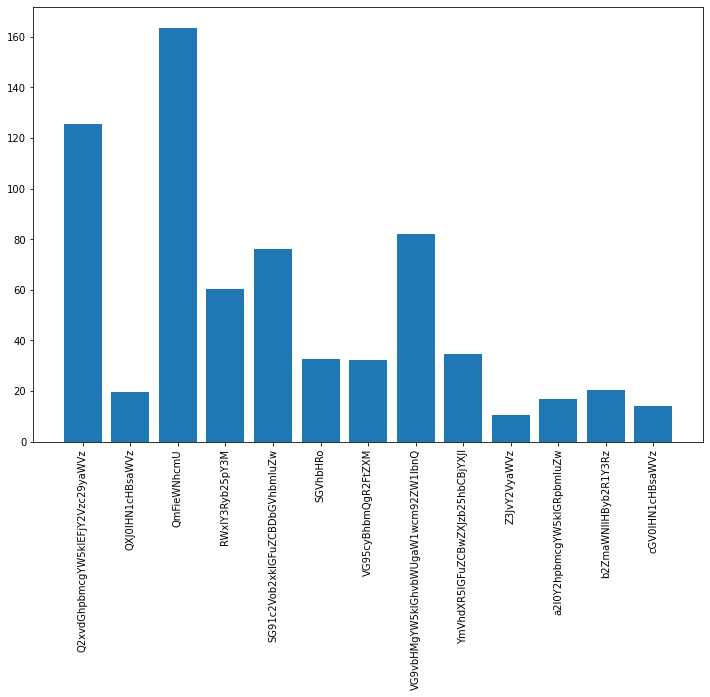

In [24]:
plt.figure(figsize = (12,8))
plt.bar(x = category,height = heights)
plt.xticks(rotation = 90)